In [1]:
# Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


In [2]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [3]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [4]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 903.3190 - root_mean_squared_error: 30.0553
Epoch 2/10
1/1 [==============================] - 0s 859us/step - loss: 887.7048 - root_mean_squared_error: 29.7944
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 876.5086 - root_mean_squared_error: 29.6059
Epoch 4/10
1/1 [==============================] - 0s 823us/step - loss: 867.2120 - root_mean_squared_error: 29.4485
Epoch 5/10
1/1 [==============================] - 0s 909us/step - loss: 859.0164 - root_mean_squared_error: 29.3090
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 851.5515 - root_mean_squared_error: 29.1814
Epoch 7/10
1/1 [==============================] - 0s 753us/step - loss: 844.6116 - root_mean_squared_error: 29.0622
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 838.0684 - root_mean_squared_error: 28.9494
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 831.8364 -

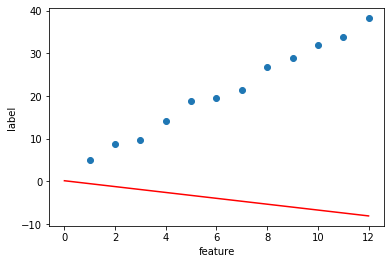

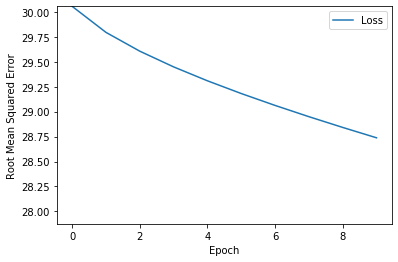

In [5]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/40
1/1 [==============================] - 0s 1ms/step - loss: 561.8052 - root_mean_squared_error: 23.7024
Epoch 2/40
1/1 [==============================] - 0s 2ms/step - loss: 549.5074 - root_mean_squared_error: 23.4416
Epoch 3/40
1/1 [==============================] - 0s 799us/step - loss: 540.7172 - root_mean_squared_error: 23.2533
Epoch 4/40
1/1 [==============================] - 0s 1ms/step - loss: 533.4349 - root_mean_squared_error: 23.0962
Epoch 5/40
1/1 [==============================] - 0s 837us/step - loss: 527.0272 - root_mean_squared_error: 22.9571
Epoch 6/40
1/1 [==============================] - 0s 1ms/step - loss: 521.2006 - root_mean_squared_error: 22.8298
Epoch 7/40
1/1 [==============================] - 0s 1ms/step - loss: 515.7921 - root_mean_squared_error: 22.7111
Epoch 8/40
1/1 [==============================] - 0s 704us/step - loss: 510.7001 - root_mean_squared_error: 22.5987
Epoch 9/40
1/1 [==============================] - 0s 1ms/step - loss: 505.8568 - r

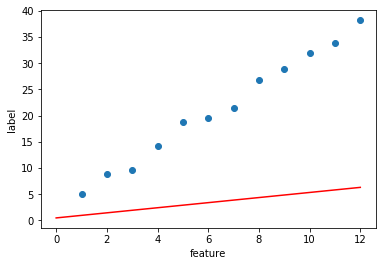

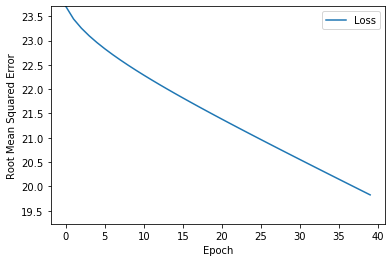

In [6]:
learning_rate=0.01
epochs= 40   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/450
1/1 [==============================] - 0s 1ms/step - loss: 367.0438 - root_mean_squared_error: 19.1584
Epoch 2/450
1/1 [==============================] - 0s 984us/step - loss: 357.1199 - root_mean_squared_error: 18.8976
Epoch 3/450
1/1 [==============================] - 0s 1ms/step - loss: 350.0519 - root_mean_squared_error: 18.7097
Epoch 4/450
1/1 [==============================] - 0s 1ms/step - loss: 344.2113 - root_mean_squared_error: 18.5529
Epoch 5/450
1/1 [==============================] - 0s 1ms/step - loss: 339.0833 - root_mean_squared_error: 18.4142
Epoch 6/450
1/1 [==============================] - 0s 1ms/step - loss: 334.4292 - root_mean_squared_error: 18.2874
Epoch 7/450
1/1 [==============================] - 0s 1ms/step - loss: 330.1166 - root_mean_squared_error: 18.1691
Epoch 8/450
1/1 [==============================] - 0s 862us/step - loss: 326.0631 - root_mean_squared_error: 18.0572
Epoch 9/450
1/1 [==============================] - 0s 1ms/step - loss: 322.2

1/1 [==============================] - 0s 1ms/step - loss: 165.6515 - root_mean_squared_error: 12.8706
Epoch 72/450
1/1 [==============================] - 0s 2ms/step - loss: 163.6506 - root_mean_squared_error: 12.7926
Epoch 73/450
1/1 [==============================] - 0s 866us/step - loss: 161.6626 - root_mean_squared_error: 12.7147
Epoch 74/450
1/1 [==============================] - 0s 901us/step - loss: 159.6876 - root_mean_squared_error: 12.6368
Epoch 75/450
1/1 [==============================] - 0s 871us/step - loss: 157.7255 - root_mean_squared_error: 12.5589
Epoch 76/450
1/1 [==============================] - 0s 875us/step - loss: 155.7762 - root_mean_squared_error: 12.4810
Epoch 77/450
1/1 [==============================] - 0s 848us/step - loss: 153.8399 - root_mean_squared_error: 12.4032
Epoch 78/450
1/1 [==============================] - 0s 804us/step - loss: 151.9164 - root_mean_squared_error: 12.3254
Epoch 79/450
1/1 [==============================] - 0s 911us/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 56.3449 - root_mean_squared_error: 7.5063
Epoch 142/450
1/1 [==============================] - 0s 1ms/step - loss: 55.2286 - root_mean_squared_error: 7.4316
Epoch 143/450
1/1 [==============================] - 0s 1ms/step - loss: 54.1245 - root_mean_squared_error: 7.3569
Epoch 144/450
1/1 [==============================] - 0s 834us/step - loss: 53.0327 - root_mean_squared_error: 7.2824
Epoch 145/450
1/1 [==============================] - 0s 1ms/step - loss: 51.9532 - root_mean_squared_error: 7.2079
Epoch 146/450
1/1 [==============================] - 0s 959us/step - loss: 50.8860 - root_mean_squared_error: 7.1334
Epoch 147/450
1/1 [==============================] - 0s 1ms/step - loss: 49.8310 - root_mean_squared_error: 7.0591
Epoch 148/450
1/1 [==============================] - 0s 918us/step - loss: 48.7882 - root_mean_squared_error: 6.9849
Epoch 149/450
1/1 [==============================] - 0s 882us/step - loss: 47.7577 - roo

1/1 [==============================] - 0s 985us/step - loss: 6.8345 - root_mean_squared_error: 2.6143
Epoch 212/450
1/1 [==============================] - 0s 2ms/step - loss: 6.5231 - root_mean_squared_error: 2.5540
Epoch 213/450
1/1 [==============================] - 0s 622us/step - loss: 6.2217 - root_mean_squared_error: 2.4943
Epoch 214/450
1/1 [==============================] - 0s 971us/step - loss: 5.9302 - root_mean_squared_error: 2.4352
Epoch 215/450
1/1 [==============================] - 0s 996us/step - loss: 5.6485 - root_mean_squared_error: 2.3767
Epoch 216/450
1/1 [==============================] - 0s 1ms/step - loss: 5.3766 - root_mean_squared_error: 2.3187
Epoch 217/450
1/1 [==============================] - 0s 706us/step - loss: 5.1143 - root_mean_squared_error: 2.2615
Epoch 218/450
1/1 [==============================] - 0s 1ms/step - loss: 4.8616 - root_mean_squared_error: 2.2049
Epoch 219/450
1/1 [==============================] - 0s 722us/step - loss: 4.6183 - root_mea

1/1 [==============================] - 0s 885us/step - loss: 0.8779 - root_mean_squared_error: 0.9370
Epoch 283/450
1/1 [==============================] - 0s 948us/step - loss: 0.8778 - root_mean_squared_error: 0.9369
Epoch 284/450
1/1 [==============================] - 0s 957us/step - loss: 0.8777 - root_mean_squared_error: 0.9369
Epoch 285/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8777 - root_mean_squared_error: 0.9368
Epoch 286/450
1/1 [==============================] - 0s 996us/step - loss: 0.8776 - root_mean_squared_error: 0.9368
Epoch 287/450
1/1 [==============================] - 0s 888us/step - loss: 0.8775 - root_mean_squared_error: 0.9368
Epoch 288/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8774 - root_mean_squared_error: 0.9367
Epoch 289/450
1/1 [==============================] - 0s 781us/step - loss: 0.8774 - root_mean_squared_error: 0.9367
Epoch 290/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8773 - root_mea

1/1 [==============================] - 0s 1ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 353/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8758 - root_mean_squared_error: 0.9358
Epoch 354/450
1/1 [==============================] - 0s 800us/step - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 355/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8766 - root_mean_squared_error: 0.9362
Epoch 356/450
1/1 [==============================] - 0s 866us/step - loss: 0.8773 - root_mean_squared_error: 0.9366
Epoch 357/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8780 - root_mean_squared_error: 0.9370
Epoch 358/450
1/1 [==============================] - 0s 876us/step - loss: 0.8784 - root_mean_squared_error: 0.9372
Epoch 359/450
1/1 [==============================] - 0s 820us/step - loss: 0.8781 - root_mean_squared_error: 0.9371
Epoch 360/450
1/1 [==============================] - 0s 833us/step - loss: 0.8776 - root_mean_

1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 424/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 425/450
1/1 [==============================] - 0s 869us/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 426/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 427/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 428/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 429/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 430/450
1/1 [==============================] - 0s 845us/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 431/450
1/1 [==============================] - 0s 856us/step - loss: 0.8768 - root_mean_squa

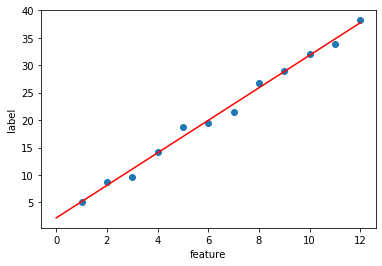

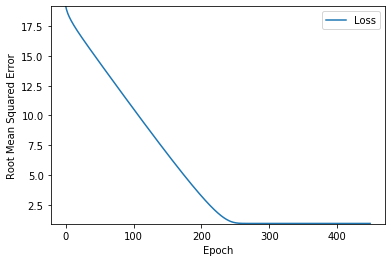

In [7]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 691.0120 - root_mean_squared_error: 26.2871
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 6680200.0000 - root_mean_squared_error: 2584.6084
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 684.6609 - root_mean_squared_error: 26.1660
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 3.9449 - root_mean_squared_error: 1.9862
Epoch 5/500
1/1 [==============================] - 0s 952us/step - loss: 1.1146 - root_mean_squared_error: 1.0558
Epoch 6/500
1/1 [==============================] - 0s 969us/step - loss: 1.0613 - root_mean_squared_error: 1.0302
Epoch 7/500
1/1 [==============================] - 0s 966us/step - loss: 1.0480 - root_mean_squared_error: 1.0237
Epoch 8/500
1/1 [==============================] - 0s 932us/step - loss: 1.0363 - root_mean_squared_error: 1.0180
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0248 - r

1/1 [==============================] - 0s 1ms/step - loss: 220232.7500 - root_mean_squared_error: 469.2896
Epoch 71/500
1/1 [==============================] - 0s 722us/step - loss: 160068.3438 - root_mean_squared_error: 400.0854
Epoch 72/500
1/1 [==============================] - 0s 921us/step - loss: 121373.7500 - root_mean_squared_error: 348.3874
Epoch 73/500
1/1 [==============================] - 0s 840us/step - loss: 99861.3672 - root_mean_squared_error: 316.0085
Epoch 74/500
1/1 [==============================] - 0s 876us/step - loss: 90739.8750 - root_mean_squared_error: 301.2306
Epoch 75/500
1/1 [==============================] - 0s 894us/step - loss: 91312.4688 - root_mean_squared_error: 302.1795
Epoch 76/500
1/1 [==============================] - 0s 810us/step - loss: 100891.3750 - root_mean_squared_error: 317.6340
Epoch 77/500
1/1 [==============================] - 0s 919us/step - loss: 120082.5312 - root_mean_squared_error: 346.5293
Epoch 78/500
1/1 [========================

1/1 [==============================] - 0s 1ms/step - loss: 173782.2969 - root_mean_squared_error: 416.8720
Epoch 136/500
1/1 [==============================] - 0s 854us/step - loss: 174301.2188 - root_mean_squared_error: 417.4940
Epoch 137/500
1/1 [==============================] - 0s 874us/step - loss: 173974.6406 - root_mean_squared_error: 417.1027
Epoch 138/500
1/1 [==============================] - 0s 838us/step - loss: 172958.4219 - root_mean_squared_error: 415.8827
Epoch 139/500
1/1 [==============================] - 0s 620us/step - loss: 171537.3906 - root_mean_squared_error: 414.1707
Epoch 140/500
1/1 [==============================] - 0s 915us/step - loss: 170045.1094 - root_mean_squared_error: 412.3653
Epoch 141/500
1/1 [==============================] - 0s 1ms/step - loss: 168786.6250 - root_mean_squared_error: 410.8365
Epoch 142/500
1/1 [==============================] - 0s 1ms/step - loss: 167982.6719 - root_mean_squared_error: 409.8569
Epoch 143/500
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 170460.8750 - root_mean_squared_error: 412.8691
Epoch 203/500
1/1 [==============================] - 0s 673us/step - loss: 170501.7344 - root_mean_squared_error: 412.9185
Epoch 204/500
1/1 [==============================] - 0s 806us/step - loss: 170521.6719 - root_mean_squared_error: 412.9427
Epoch 205/500
1/1 [==============================] - 0s 1ms/step - loss: 170518.8125 - root_mean_squared_error: 412.9392
Epoch 206/500
1/1 [==============================] - 0s 963us/step - loss: 170495.9219 - root_mean_squared_error: 412.9115
Epoch 207/500
1/1 [==============================] - 0s 2ms/step - loss: 170459.6562 - root_mean_squared_error: 412.8676
Epoch 208/500
1/1 [==============================] - 0s 1ms/step - loss: 170418.5781 - root_mean_squared_error: 412.8178
Epoch 209/500
1/1 [==============================] - 0s 683us/step - loss: 170381.2969 - root_mean_squared_error: 412.7727
Epoch 210/500
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 170416.7344 - root_mean_squared_error: 412.8156
Epoch 270/500
1/1 [==============================] - 0s 1ms/step - loss: 170418.4375 - root_mean_squared_error: 412.8177
Epoch 271/500
1/1 [==============================] - 0s 773us/step - loss: 170419.7031 - root_mean_squared_error: 412.8192
Epoch 272/500
1/1 [==============================] - 0s 886us/step - loss: 170420.5625 - root_mean_squared_error: 412.8203
Epoch 273/500
1/1 [==============================] - 0s 588us/step - loss: 170420.6719 - root_mean_squared_error: 412.8204
Epoch 274/500
1/1 [==============================] - 0s 972us/step - loss: 170420.1406 - root_mean_squared_error: 412.8197
Epoch 275/500
1/1 [==============================] - 0s 795us/step - loss: 170419.2031 - root_mean_squared_error: 412.8186
Epoch 276/500
1/1 [==============================] - 0s 1ms/step - loss: 170418.0156 - root_mean_squared_error: 412.8172
Epoch 277/500
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 337/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 338/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 339/500
1/1 [==============================] - 0s 721us/step - loss: 170417.3750 - root_mean_squared_error: 412.8164
Epoch 340/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 341/500
1/1 [==============================] - 0s 865us/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 342/500
1/1 [==============================] - 0s 890us/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 343/500
1/1 [==============================] - 0s 917us/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 344/500
1/1 [===================

1/1 [==============================] - 0s 3ms/step - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 404/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 405/500
1/1 [==============================] - 0s 847us/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 406/500
1/1 [==============================] - 0s 936us/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 407/500
1/1 [==============================] - 0s 705us/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 170417.6406 - root_mean_squared_error: 412.81 - 0s 849us/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 409/500
1/1 [==============================] - 0s 824us/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 410/500
1/1 [==============================] - 0s 599us/step - loss: 170417.5000 - root

1/1 [==============================] - 0s 1ms/step - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 470/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.6719 - root_mean_squared_error: 412.8167
Epoch 471/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 472/500
1/1 [==============================] - 0s 980us/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 473/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 474/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 475/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 476/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 477/500
1/1 [=========================

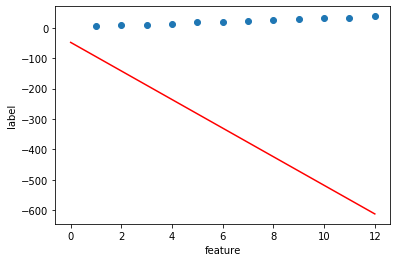

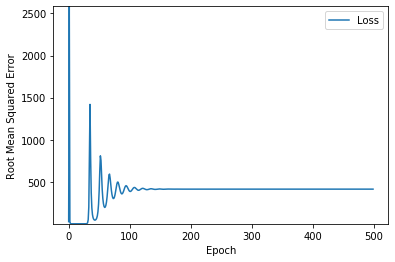

In [8]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 1061.6759 - root_mean_squared_error: 32.5834
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 898.4755 - root_mean_squared_error: 29.9746
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 792.9202 - root_mean_squared_error: 28.1588
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 711.7546 - root_mean_squared_error: 26.6787
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 644.8040 - root_mean_squared_error: 25.3930
Epoch 6/500
1/1 [==============================] - 0s 882us/step - loss: 587.4312 - root_mean_squared_error: 24.2370
Epoch 7/500
1/1 [==============================] - 0s 911us/step - loss: 537.0815 - root_mean_squared_error: 23.1750
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 492.1779 - root_mean_squared_error: 22.1851
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 451.

1/1 [==============================] - 0s 1ms/step - loss: 1.3175 - root_mean_squared_error: 1.1478
Epoch 73/500
1/1 [==============================] - 0s 1ms/step - loss: 1.3054 - root_mean_squared_error: 1.1426
Epoch 74/500
1/1 [==============================] - 0s 664us/step - loss: 1.2932 - root_mean_squared_error: 1.1372
Epoch 75/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2806 - root_mean_squared_error: 1.1316
Epoch 76/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2678 - root_mean_squared_error: 1.1260
Epoch 77/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2548 - root_mean_squared_error: 1.1202
Epoch 78/500
1/1 [==============================] - 0s 886us/step - loss: 1.2415 - root_mean_squared_error: 1.1142
Epoch 79/500
1/1 [==============================] - 0s 817us/step - loss: 1.2281 - root_mean_squared_error: 1.1082
Epoch 80/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2145 - root_mean_squared_erro

1/1 [==============================] - 0s 835us/step - loss: 0.9398 - root_mean_squared_error: 0.9694
Epoch 144/500
1/1 [==============================] - 0s 2ms/step - loss: 0.9674 - root_mean_squared_error: 0.9835
Epoch 145/500
1/1 [==============================] - 0s 896us/step - loss: 1.0156 - root_mean_squared_error: 1.0078
Epoch 146/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0882 - root_mean_squared_error: 1.0432
Epoch 147/500
1/1 [==============================] - 0s 1ms/step - loss: 1.1679 - root_mean_squared_error: 1.0807
Epoch 148/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2097 - root_mean_squared_error: 1.0998
Epoch 149/500
1/1 [==============================] - 0s 911us/step - loss: 1.1859 - root_mean_squared_error: 1.0890
Epoch 150/500
1/1 [==============================] - 0s 1ms/step - loss: 1.1233 - root_mean_squared_error: 1.0598
Epoch 151/500
1/1 [==============================] - 0s 988us/step - loss: 1.0610 - root_mean_sq

1/1 [==============================] - 0s 1ms/step - loss: 1.0467 - root_mean_squared_error: 1.0231
Epoch 215/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0482 - root_mean_squared_error: 1.0238
Epoch 216/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0490 - root_mean_squared_error: 1.0242
Epoch 217/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0490 - root_mean_squared_error: 1.0242
Epoch 218/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0483 - root_mean_squared_error: 1.0239
Epoch 219/500
1/1 [==============================] - 0s 904us/step - loss: 1.0471 - root_mean_squared_error: 1.0233
Epoch 220/500
1/1 [==============================] - 0s 729us/step - loss: 1.0458 - root_mean_squared_error: 1.0226
Epoch 221/500
1/1 [==============================] - 0s 845us/step - loss: 1.0445 - root_mean_squared_error: 1.0220
Epoch 222/500
1/1 [==============================] - 0s 859us/step - loss: 1.0436 - root_mean_sq

1/1 [==============================] - 0s 675us/step - loss: 1.0456 - root_mean_squared_error: 1.0226
Epoch 286/500
1/1 [==============================] - 0s 982us/step - loss: 1.0456 - root_mean_squared_error: 1.0226
Epoch 287/500
1/1 [==============================] - 0s 776us/step - loss: 1.0456 - root_mean_squared_error: 1.0225
Epoch 288/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0456 - root_mean_squared_error: 1.0225
Epoch 289/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 290/500
1/1 [==============================] - 0s 872us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 291/500
1/1 [==============================] - 0s 883us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 292/500
1/1 [==============================] - 0s 870us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 1.0455 - root_mean_sq

1/1 [==============================] - 0s 806us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 356/500
1/1 [==============================] - 0s 918us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 357/500
1/1 [==============================] - 0s 661us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 358/500
1/1 [==============================] - 0s 889us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 359/500
1/1 [==============================] - 0s 884us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 360/500
1/1 [==============================] - 0s 754us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 361/500
1/1 [==============================] - 0s 661us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 362/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 363/500
1/1 [==============================] - 0s 688us/step - loss: 1.0455 - root

1/1 [==============================] - 0s 660us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 427/500
1/1 [==============================] - 0s 858us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 428/500
1/1 [==============================] - 0s 870us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 429/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 430/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 431/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 432/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 433/500
1/1 [==============================] - 0s 942us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 434/500
1/1 [==============================] - 0s 891us/step - loss: 1.0455 - root_mean_

1/1 [==============================] - 0s 896us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 498/500
1/1 [==============================] - 0s 810us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 499/500
1/1 [==============================] - 0s 874us/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 500/500
1/1 [==============================] - 0s 852us/step - loss: 1.0455 - root_mean_squared_error: 1.0225


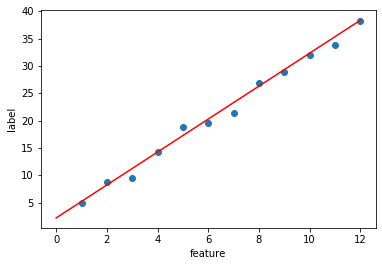

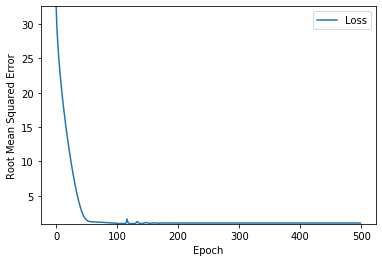

In [9]:
# Set the learning rate and number of epochs
learning_rate= 0.1  # Replace ? with a floating-point number
epochs= 500   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 1ms/step - loss: 959.1298 - root_mean_squared_error: 30.9698
Epoch 2/70
1/1 [==============================] - 0s 2ms/step - loss: 746.2546 - root_mean_squared_error: 27.3177
Epoch 3/70
1/1 [==============================] - 0s 2ms/step - loss: 616.6082 - root_mean_squared_error: 24.8316
Epoch 4/70
1/1 [==============================] - 0s 863us/step - loss: 521.5389 - root_mean_squared_error: 22.8372
Epoch 5/70
1/1 [==============================] - 0s 2ms/step - loss: 446.4471 - root_mean_squared_error: 21.1293
Epoch 6/70
1/1 [==============================] - 0s 937us/step - loss: 384.7331 - root_mean_squared_error: 19.6146
Epoch 7/70
1/1 [==============================] - 0s 989us/step - loss: 332.7736 - root_mean_squared_error: 18.2421
Epoch 8/70
1/1 [==============================] - 0s 3ms/step - loss: 288.3336 - root_mean_squared_error: 16.9804
Epoch 9/70
1/1 [==============================] - 0s 1ms/step - loss: 249.9209 - r

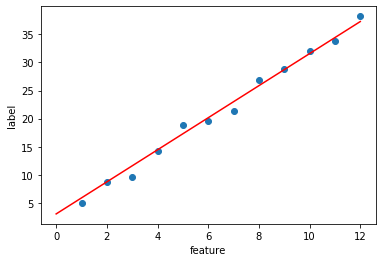

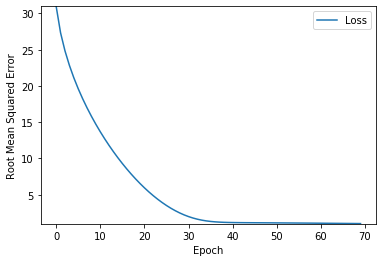

In [10]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 817.3846 - root_mean_squared_error: 28.5899
Epoch 2/100
1/1 [==============================] - 0s 944us/step - loss: 744.5005 - root_mean_squared_error: 27.2855
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 694.8774 - root_mean_squared_error: 26.3605
Epoch 4/100
1/1 [==============================] - 0s 901us/step - loss: 655.2036 - root_mean_squared_error: 25.5969
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 621.3350 - root_mean_squared_error: 24.9266
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 591.3679 - root_mean_squared_error: 24.3181
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 564.2484 - root_mean_squared_error: 23.7539
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 539.3243 - root_mean_squared_error: 23.2234
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 516.1

1/1 [==============================] - 0s 1ms/step - loss: 7.9888 - root_mean_squared_error: 2.8265
Epoch 72/100
1/1 [==============================] - 0s 2ms/step - loss: 7.0066 - root_mean_squared_error: 2.6470
Epoch 73/100
1/1 [==============================] - 0s 1ms/step - loss: 6.1322 - root_mean_squared_error: 2.4763
Epoch 74/100
1/1 [==============================] - 0s 949us/step - loss: 5.3586 - root_mean_squared_error: 2.3149
Epoch 75/100
1/1 [==============================] - 0s 3ms/step - loss: 4.6787 - root_mean_squared_error: 2.1630
Epoch 76/100
1/1 [==============================] - 0s 1ms/step - loss: 4.0856 - root_mean_squared_error: 2.0213
Epoch 77/100
1/1 [==============================] - 0s 876us/step - loss: 3.5722 - root_mean_squared_error: 1.8900
Epoch 78/100
1/1 [==============================] - 0s 905us/step - loss: 3.1315 - root_mean_squared_error: 1.7696
Epoch 79/100
1/1 [==============================] - 0s 846us/step - loss: 2.7566 - root_mean_squared_er

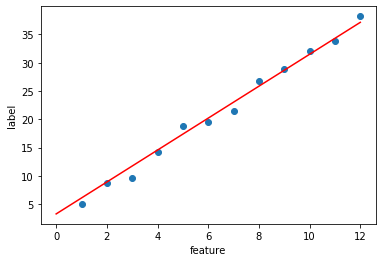

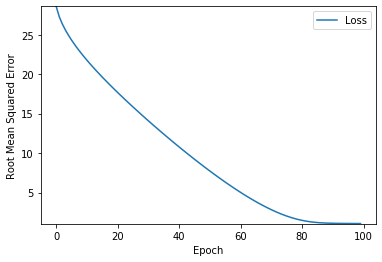

In [11]:
learning_rate=0.05
epochs=100
my_batch_size= 45  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125
12/12 [==============================] - 0s 644us/step - loss: 367.4681 - root_mean_squared_error: 19.1695
Epoch 2/125
12/12 [==============================] - 0s 1ms/step - loss: 216.5108 - root_mean_squared_error: 14.7143
Epoch 3/125
12/12 [==============================] - 0s 556us/step - loss: 127.4577 - root_mean_squared_error: 11.2897
Epoch 4/125
12/12 [==============================] - 0s 753us/step - loss: 68.0874 - root_mean_squared_error: 8.2515
Epoch 5/125
12/12 [==============================] - 0s 1ms/step - loss: 30.8130 - root_mean_squared_error: 5.5509
Epoch 6/125
12/12 [==============================] - 0s 964us/step - loss: 10.4518 - root_mean_squared_error: 3.2329
Epoch 7/125
12/12 [==============================] - 0s 818us/step - loss: 2.6432 - root_mean_squared_error: 1.6258
Epoch 8/125
12/12 [==============================] - 0s 597us/step - loss: 1.2348 - root_mean_squared_error: 1.1112
Epoch 9/125
12/12 [==============================] - 0s 580us/st

12/12 [==============================] - 0s 848us/step - loss: 1.2097 - root_mean_squared_error: 1.0998
Epoch 71/125
12/12 [==============================] - 0s 966us/step - loss: 0.9921 - root_mean_squared_error: 0.9960
Epoch 72/125
12/12 [==============================] - 0s 921us/step - loss: 1.2796 - root_mean_squared_error: 1.1312
Epoch 73/125
12/12 [==============================] - 0s 632us/step - loss: 1.1119 - root_mean_squared_error: 1.0545
Epoch 74/125
12/12 [==============================] - 0s 776us/step - loss: 1.2363 - root_mean_squared_error: 1.1119
Epoch 75/125
12/12 [==============================] - 0s 564us/step - loss: 1.2896 - root_mean_squared_error: 1.1356
Epoch 76/125
12/12 [==============================] - 0s 731us/step - loss: 1.1989 - root_mean_squared_error: 1.0949
Epoch 77/125
12/12 [==============================] - 0s 557us/step - loss: 1.1737 - root_mean_squared_error: 1.0834
Epoch 78/125
12/12 [==============================] - 0s 580us/step - loss: 1

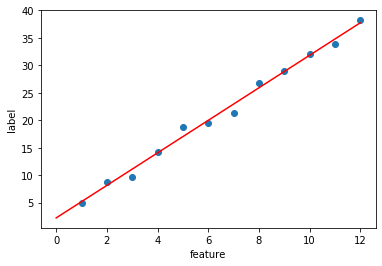

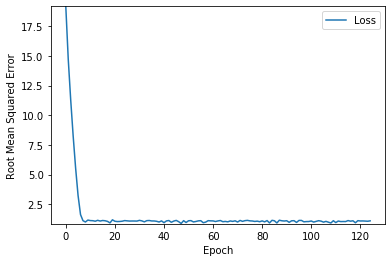

In [12]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)